# Modeling a region of the chromatin

## Load previous data

In [1]:
from pytadbit import load_chromosome

In [2]:
crm = load_chromosome('results/fragment/chr3-33900000_35400000_20k.tdb')

Load raw data matrices, and normalized matrices

In [4]:
B, PSC = crm.experiments
B.load_hic_data('results/fragment/mouse_B_both/04_normalizing/20000_raw/raw_chr3-33900000_35400000.mat')
B.load_norm_data('results/fragment/mouse_B_both/04_normalizing/20000_norm/norm_chr3-33900000_35400000.mat')
PSC.load_hic_data('results/fragment/mouse_PSC_both/04_normalizing/20000_raw/raw_chr3-33900000_35400000.mat')
PSC.load_norm_data('results/fragment/mouse_PSC_both/04_normalizing/20000_norm/norm_chr3-33900000_35400000.mat')

In [5]:
B, PSC

(Experiment B (resolution: 20 kb, TADs: 8, Hi-C rows: 75, normalized: visibility),
 Experiment PSC (resolution: 20 kb, TADs: 11, Hi-C rows: 75, normalized: visibility))

Check that the data is there:

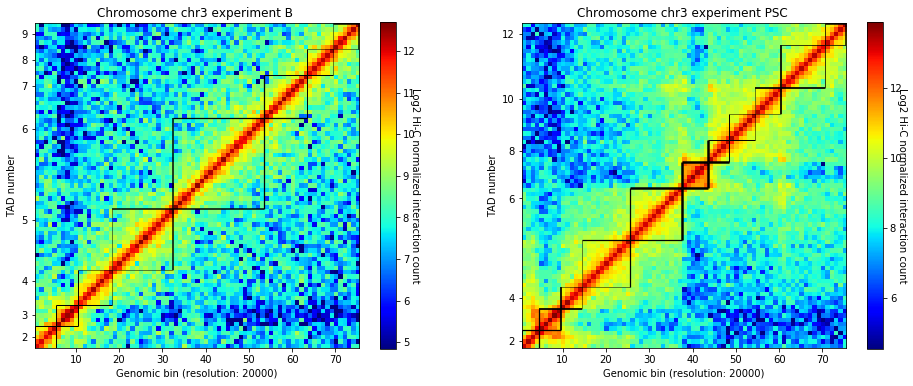

In [6]:
crm.visualize(['B', 'PSC'], normalized=True, paint_tads=True)

## Modeling

We use the best parameters obtained from the optimization:

In [8]:
optimal_params = {
     'dcutoff': 2.0,
     'kbending': 0.0,
     'kforce': 5,
     'lowfreq': -1.3,
     'maxdist': 500.0,
     'reference': 'Stadhouders R, Vidal E, Serra F, Di Stefano B et al. 2018',
     'scale': 0.01,
     'upfreq': 0.2}

In [9]:
models_B = B.model_region(start=1, end=75, n_models=400, n_keep=200, n_cpus=8,
                            config=optimal_params)

In [10]:
models_PSC = PSC.model_region(start=1, end=75, n_models=400, n_keep=200, n_cpus=8,
                              config=optimal_params)

In [11]:
print models_B.description

{'assembly': 'mm10', 'experiment type': 'Hi-C', 'species': 'Mus musculus', 'chromosome': 'chr3', 'cycle': 'B', 'restriction enzyme': 'MboI', 'end': 1500000, 'project': '3DAROC', 'start': 0, 'identifier': None, 'resolution': 20000, 'cell type': None}


We still can access to the experiment object from the 3D models:

In [12]:
print models_B.experiment
print models_PSC.experiment

Experiment B:
   resolution        : 20 kb
   TADs              : 8
   Hi-C rows         : 75
   normalized        : visibility
   identifier        : UNKNOWN
   cell type         : UNKNOWN
   restriction enzyme: MboI
   project           : 3DAROC
   assembly          : mm10
   species           : Mus musculus
   cycle             : B

Experiment PSC:
   resolution        : 20 kb
   TADs              : 11
   Hi-C rows         : 75
   normalized        : visibility
   identifier        : UNKNOWN
   cell type         : UNKNOWN
   restriction enzyme: MboI
   project           : 3DAROC
   assembly          : mm10
   species           : Mus musculus
   cycle             : B



## Structural Models

The definition of the "best models" can be changed at any time:

 - Select top 10 models

In [13]:
models_B.define_best_models(10)
print "Lowest 10 IMP OF models:"
print models_B

Lowest 10 IMP OF models:
StructuralModels with 10 models of 75 particles
   (objective function range: 110 - 113)
   (corresponding to the best models out of 200 models).
  IMP modeling used this parameters:
   - maxdist     : 2.5
   - scale       : 0.01
   - dcutoff     : 2.0
   - reference   : Stadhouders R, Vidal E, Serra F, Di Stefano B et al. 2018
   - kforce      : 5
   - lowfreq     : -1.3
   - upfreq      : 0.2
   - lowrdist    : 1.0
   - container   : {'shape': None, 'radius': None, 'cforce': None, 'height': None}
   - resolution  : 20000
   - kbending    : 0.0
  Models where clustered into 0 clusters


 - Select top 100 models

In [14]:
models_B.define_best_models(100)
print "Lowest 100 IMP OF models:"
print models_B

Lowest 100 IMP OF models:
StructuralModels with 100 models of 75 particles
   (objective function range: 110 - 117)
   (corresponding to the best models out of 200 models).
  IMP modeling used this parameters:
   - maxdist     : 2.5
   - scale       : 0.01
   - dcutoff     : 2.0
   - reference   : Stadhouders R, Vidal E, Serra F, Di Stefano B et al. 2018
   - kforce      : 5
   - lowfreq     : -1.3
   - upfreq      : 0.2
   - lowrdist    : 1.0
   - container   : {'shape': None, 'radius': None, 'cforce': None, 'height': None}
   - resolution  : 20000
   - kbending    : 0.0
  Models where clustered into 0 clusters


 - Get the data for the lowest IMP OF model (number 0) in the set of models

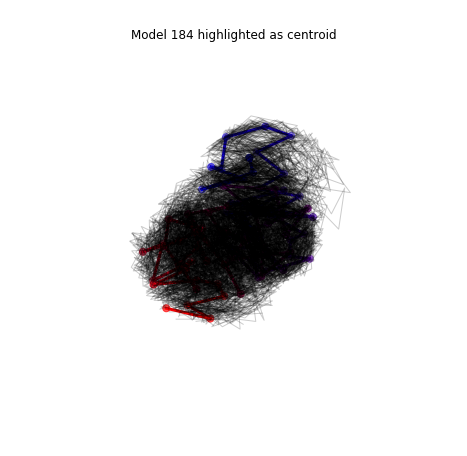

In [15]:
models_B.view_models(tool='plot')

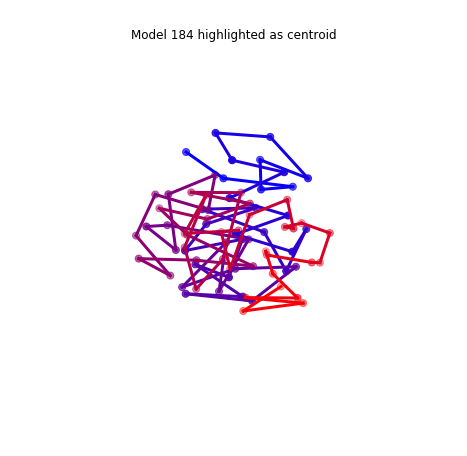

In [16]:
models_B.view_models(models=[0], tool='plot', azimuth=40, elevation=20)

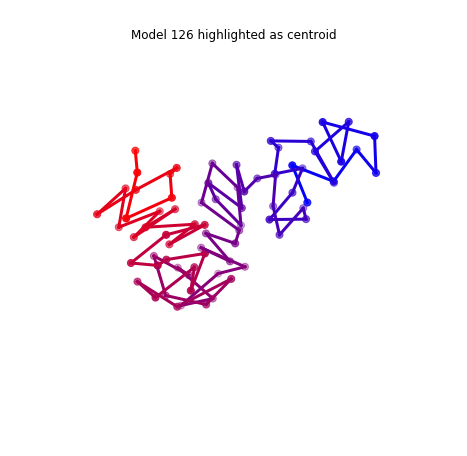

In [17]:
models_PSC.view_models(models=[0], tool='plot', azimuth=40, elevation=20)

In [18]:
model = models_B[0]
print model

IMP model ranked 1 (75 particles) with: 
 - Final objective function value: 110.987461959
 - random initial value: 184
 - first coordinates:
        X      Y      Z
    -4565  -5160   4885
    -4550  -4999   4823
    -4762  -4894   4746



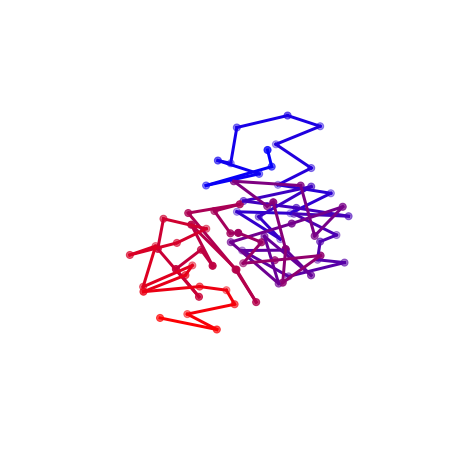

In [19]:
model.view_model(tool='plot')

Get the IMP OF of the stored model in "model":

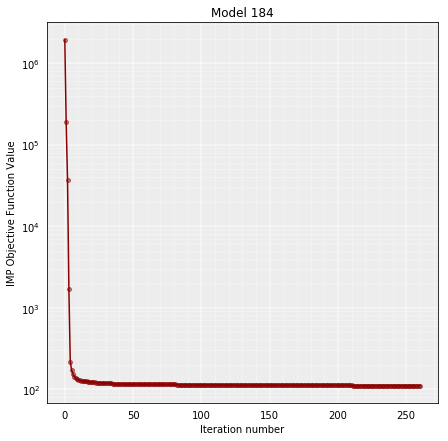

In [20]:
model.objective_function(log=True, smooth=False)

Calculate the correlation coefficient between a set of kept models and the original HiC matrix

/home/participant/miniconda2/lib/python2.7/site-packages/pytadbit/modelling/structuralmodels.py:1869: RuntimeWarning: divide by zero encountered in log2
  ims = ax.imshow(log2(self._original_data), origin='lower',


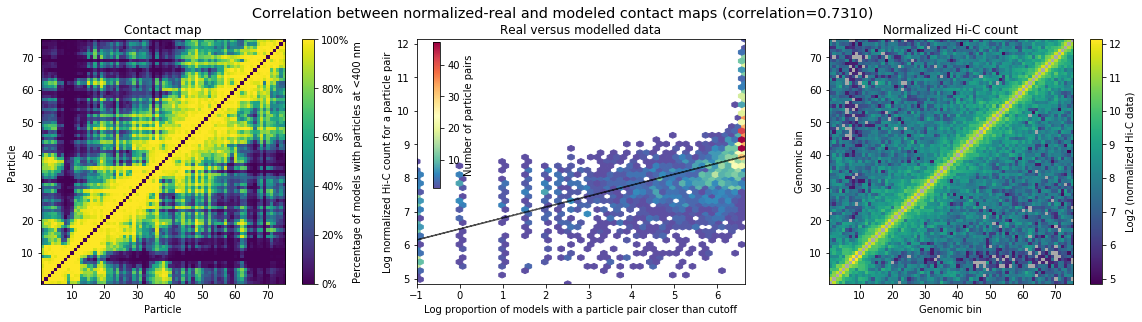

SpearmanrResult(correlation=0.7310037840062418, pvalue=0.0)

In [21]:
models_B.correlate_with_real_data(plot=True, cutoff=400)

To have a look at the data that was used to define restraints:

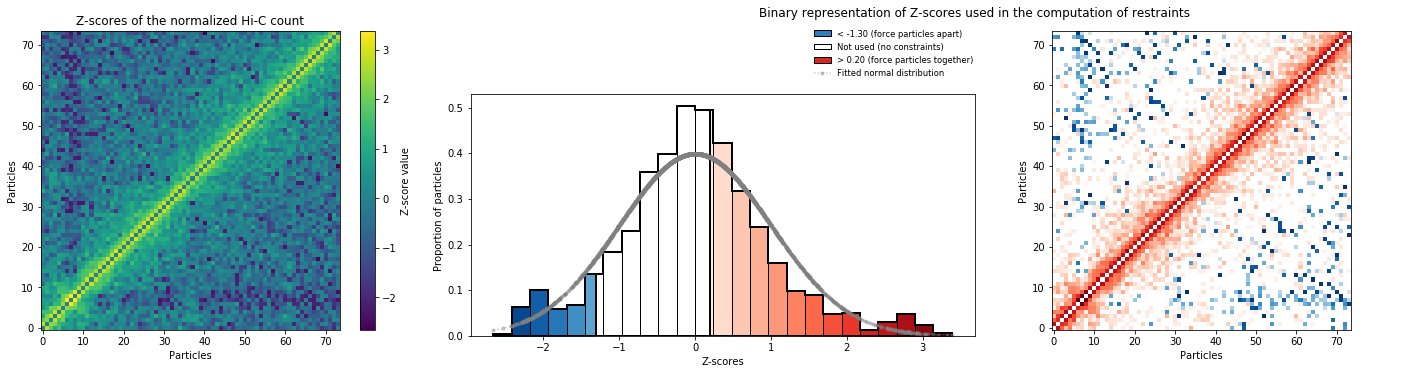

In [22]:
models_B.zscore_plot()

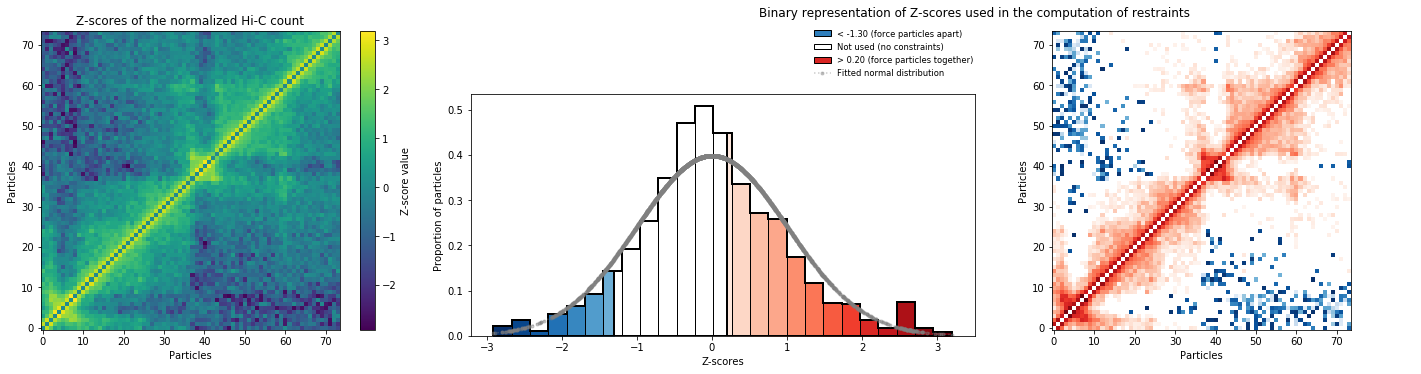

In [23]:
models_PSC.zscore_plot()

Total number of clusters: 14
   Cluster #1 has 8 models [top model: 88]
   Cluster #2 has 5 models [top model: 184]
   Cluster #3 has 5 models [top model: 71]
   Cluster #4 has 4 models [top model: 172]
   Cluster #5 has 3 models [top model: 72]
   Cluster #6 has 3 models [top model: 327]
   Cluster #7 has 2 models [top model: 22]
   Cluster #8 has 2 models [top model: 66]
   Cluster #9 has 2 models [top model: 385]
   Cluster #10 has 2 models [top model: 342]
   Cluster #11 has 2 models [top model: 353]
   Cluster #12 has 2 models [top model: 167]
   Cluster #13 has 2 models [top model: 357]
   Cluster #14 has 2 models [top model: 188]



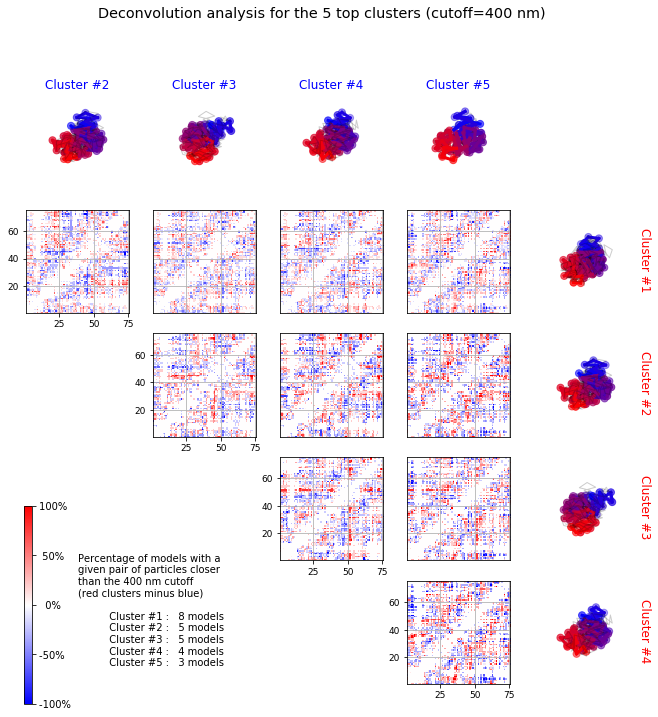

In [32]:
models_B.align_models(in_place=True)
models_B.deconvolve(fact=0.35, dcutoff=400, represent_models='best', n_best_clusters=5)

In [35]:
# Cluster models based on structural similarity
models_B.cluster_models(fact=0.75, dcutoff=300)
print models_B.clusters

Number of singletons excluded from clustering: 0 (total singletons: 0)
Total number of clusters: 2
   Cluster #1 has 57 models [top model: 184]
   Cluster #2 has 43 models [top model: 385]

Total number of clusters: 2
   Cluster #1 has 57 models [top model: 184]
   Cluster #2 has 43 models [top model: 385]



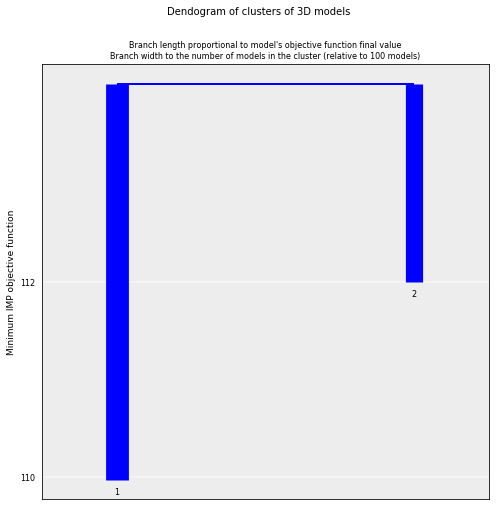

In [36]:
# Plot the resulting clusers
cl = models_B.cluster_analysis_dendrogram(color=True)

In [40]:
# Cluster models based on structural similarity
models_PSC.cluster_models(fact=0.75, dcutoff=300)
print models_PSC.clusters

Number of singletons excluded from clustering: 0 (total singletons: 0)
Total number of clusters: 1
   Cluster #1 has 200 models [top model: 126]

Total number of clusters: 1
   Cluster #1 has 200 models [top model: 126]



In [38]:
# Plot the resulting clusers
cl = models_PSC.cluster_analysis_dendrogram(color=True)

/home/participant/miniconda2/lib/python2.7/site-packages/pytadbit/modelling/structuralmodels.py:594: UserWarning: Need at least 2 clusters to display...
  warn("Need at least 2 clusters to display...")


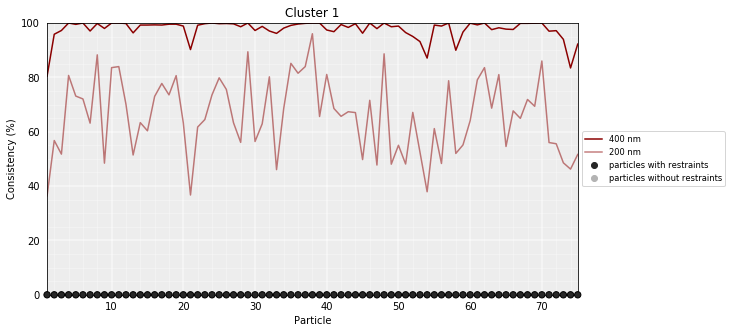

In [43]:
# Calculate the consistency plot for all models in the first cluster (cluster 0)
models_B.model_consistency(cluster=1, cutoffs=(200,400))

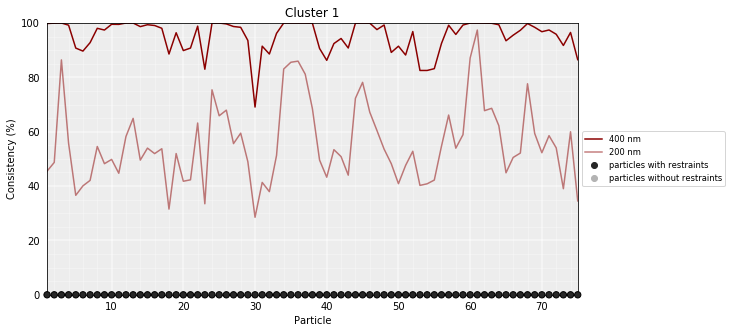

In [44]:
# Calculate the consistency plot for all models in the first cluster (cluster 0)
models_PSC.model_consistency(cluster=1, cutoffs=(200,400))

/home/participant/.local/lib/python2.7/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/participant/.local/lib/python2.7/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/participant/.local/lib/python2.7/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/participant/.local/lib/python2.7/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/participant/.local/lib/python2.7/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


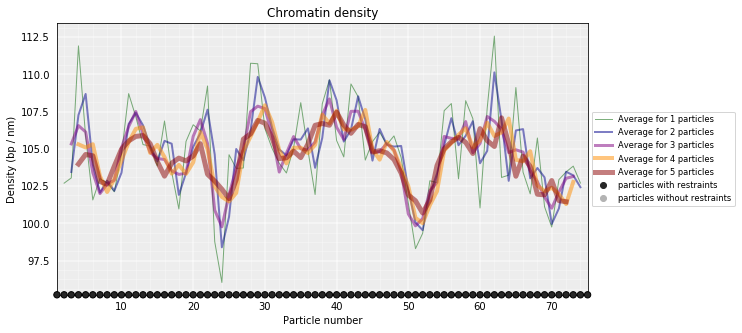

In [45]:
# Calculate a DNA density plot
models_B.density_plot()

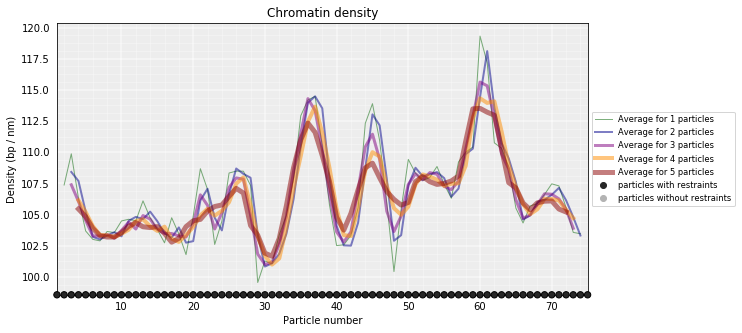

In [46]:
# Calculate a DNA density plot
models_PSC.density_plot()

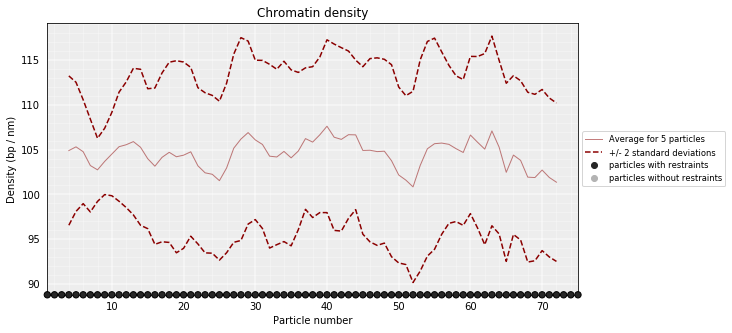

In [47]:
# Get a similar plot for only the top cluster and show the standar deviation for a specific(s) running window (steps)
models_B.density_plot(cluster=1,error=True, steps=(5))

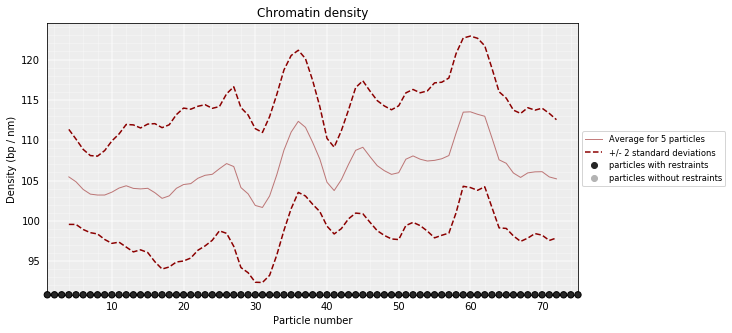

In [49]:
# Get a similar plot for only the top cluster and show the standar deviation for a specific(s) running window (steps)
models_PSC.density_plot(cluster=1,error=True, steps=(5))

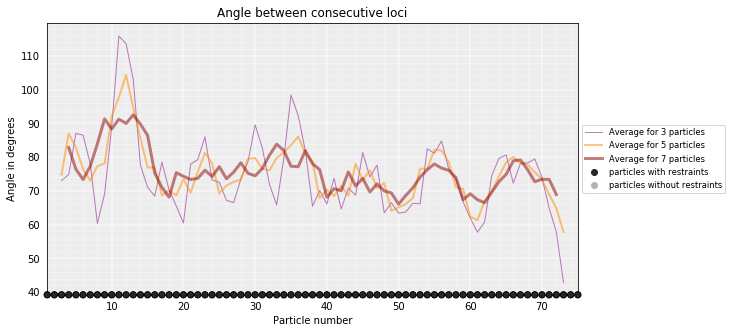

In [50]:
models_B.walking_angle(steps=(3, 5, 7), signed=False)

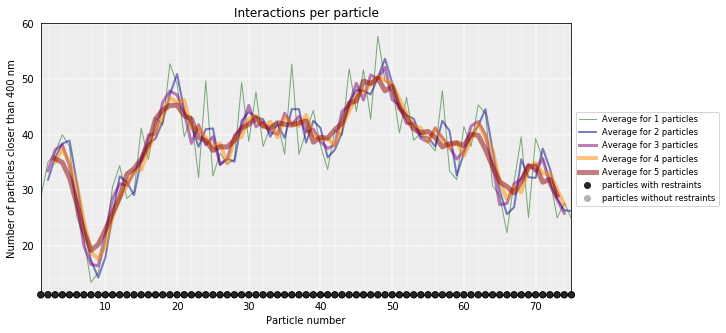

In [51]:
models_B.interactions(cutoff=400)

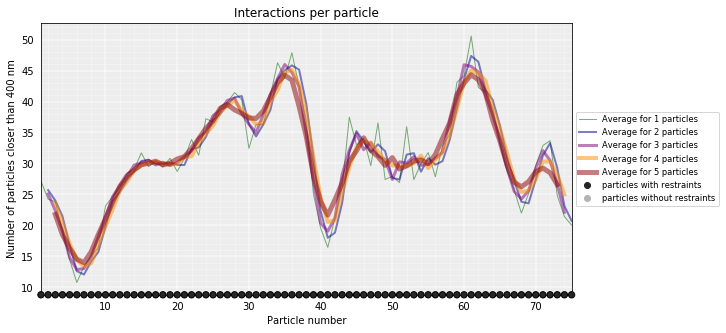

In [52]:
models_PSC.interactions(cutoff=400)

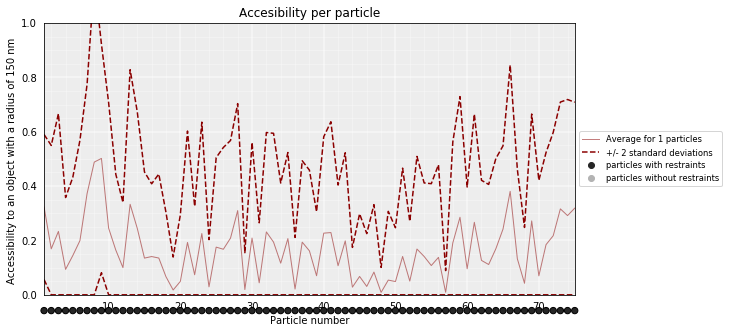

In [53]:
models_B.accessibility(cluster=1, radius=150, nump=10, superradius=300)

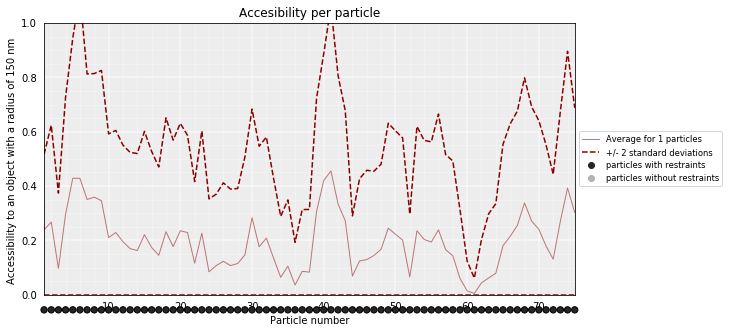

In [55]:
models_PSC.accessibility(cluster=1, radius=150, nump=10, superradius=300)

In [56]:
models_B.contact_map(models=range(5,10), cutoff=400, savedata="contact.txt")

In [62]:
models_B.median_3d_dist(30, 50, plot=False)

314.4857004220417

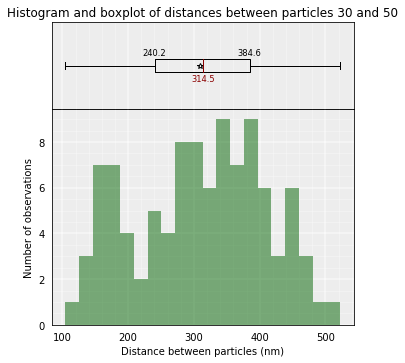

In [63]:
models_B.median_3d_dist(30, 50, plot=True)

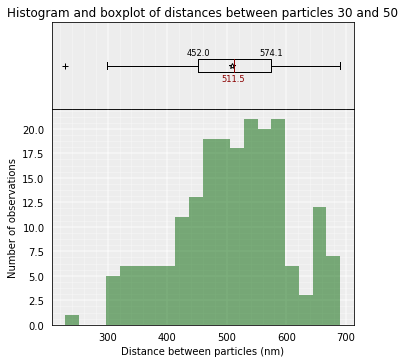

In [64]:
models_PSC.median_3d_dist(30, 50, plot=True)

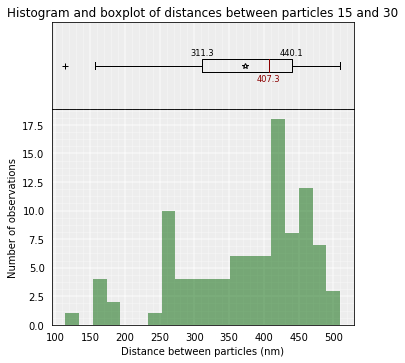

In [65]:
models_B.median_3d_dist(15, 30, models=range(100))

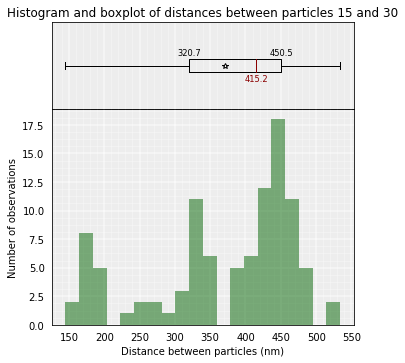

In [68]:
models_PSC.median_3d_dist(15, 30, models=range(100))

In [74]:
! mkdir -p results/models_B

In [69]:
# Save your entire analysis and models
models_B.save_models('results/models_B/B.models')

In [70]:
from pytadbit import load_structuralmodels

In [71]:
# Load the models
loaded_models = load_structuralmodels('results/models_B/B.models')
print loaded_models

StructuralModels with 100 models of 75 particles
   (objective function range: 110 - 117)
   (corresponding to the best models out of 200 models).
  IMP modeling used this parameters:
   - maxdist     : 2.5
   - scale       : 0.01
   - dcutoff     : 2.0
   - reference   : Stadhouders R, Vidal E, Serra F, Di Stefano B et al. 2018
   - kforce      : 5
   - lowfreq     : -1.3
   - upfreq      : 0.2
   - lowrdist    : 1.0
   - container   : {'shape': None, 'radius': None, 'cforce': None, 'height': None}
   - resolution  : 20000
   - kbending    : 0.0
  Models where clustered into 2 clusters


In [75]:
models_B.experiment

Experiment B (resolution: 20 kb, TADs: 8, Hi-C rows: 75, normalized: visibility)

In [76]:
# Write a CMM file for the top model
models_B.write_cmm(directory="results/models_B", model_num=0)
# Write CMM ofcentroid model
models_B.write_cmm(directory="results/models_B", model_num=models_B.centroid_model(cluster=1))
# Write a XYZ file for the top model
models_B.write_xyz(directory="results/models_B", model_num=0)
# Write a XYZ file for the top 10 models
models_B.write_xyz(directory="results/models_B", models=range(10))
# Write a XYZ file for the cluster 1 models
models_B.write_xyz(directory="results/models_B", cluster=1)

Write json to visualize in TADkit. http://sgt.cnag.cat/3dg/tadkit/demo.h/

We indicate the region inside Chromosome 3 for TADkit to position the tracks correctly

In [77]:
# Write TADkit JSON
models_B.description['chrom_start'] = 33900000
models_B.description['chrom_end'] = 35400000
models_B.write_json(filename="results/models_B/models_B.json", title="Mouse B")

In [78]:
! mkdir -p results/models_PSC

In [ ]:
models_PSC.save_models('results/models_PSC/PSC.models')

In [79]:
models_PSC.description['chrom_start'] = 33900000
models_PSC.description['chrom_end'] = 35400000
models_PSC.write_json(filename="results/models_PSC/models_PSC.json", title="Mouse PSC")